# Lesson 5: APIs to get data from the web

In this lesson, you will work with a weather API (Application Programming Interface) to get the current conditions at any location.

Start by importing some helper functions
* **Note:** You are now importing `print_llm_response` from the `aisetup` package!


In [1]:
import os
import requests
from aisetup import print_llm_response
from dotenv import load_dotenv

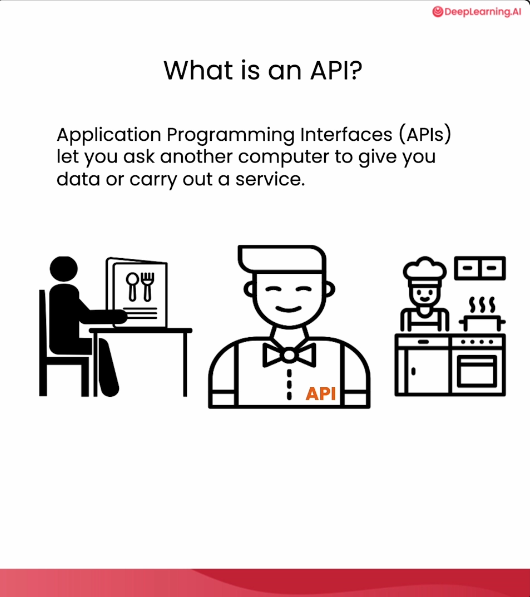

## Retrieving weather data from an API

In this section, you'll use an API to retrieve real time weather data from [https://openweathermap.org](https://openweathermap.org). 

Most APIs require an **API key**. You can think of this as a password that is unique to you.

The API key has been setup for this learning environment, so you don't have to do anything except run the code.

You can visit the [openweathermap website](https://openweathermap.org/price) for information about setting up an API key to use outside of this learning platform.

Run the following cell to setup the API key for this lesson:

In [2]:
# Get the Weather API key from the .env file
# https://openweathermap.org/price
load_dotenv('.env', override=True)
api_key = os.getenv('WEATHER_API_KEY')

Set up the latitude and longitude coordinates to pass to the API:

In [3]:
# Store the latitude value in the 'lat' variable
lat = 37.4419   # Palo Alto, CA

# Store the longitude value in the 'long' variable
lon = -122.1430

**Note:** Feel free to change the lat and lon values above to your current location or a place you would like to retrieve weather data!

Call the Weather API, passing in the API key and your coordinates.
* These are added as part of the `url` f-string below:

In [4]:
url = f"https://api.openweathermap.org/data/2.5/forecast?units=metric&cnt=1&lat={lat}&lon={lon}&appid={api_key}"

# Use the get function from the requests library to store the response from the API
response = requests.get(url)

Now extract the data from the response variable:

In [5]:
# Take the response from the API (in JSON) and assign it to a Python dictionary
data = response.json()

# Print
print(data)

{'cod': '200', 'message': 0, 'cnt': 1, 'list': [{'dt': 1728324000, 'main': {'temp': 24.37, 'feels_like': 23.8, 'temp_min': 24.37, 'temp_max': 29.28, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 997, 'humidity': 36, 'temp_kf': -4.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 23}, 'wind': {'speed': 1.71, 'deg': 1, 'gust': 1.78}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-10-07 18:00:00'}], 'city': {'id': 5380748, 'name': 'Palo Alto', 'coord': {'lat': 37.4419, 'lon': -122.143}, 'country': 'US', 'population': 64403, 'timezone': -25200, 'sunrise': 1728310181, 'sunset': 1728351748}}


**Note** The responses you get from APIs are usually given in JSON (JavaScript Object Notation) format, which is a variation on a python dictionary.

## Display the weather forecast

To display the weather forecast in a nicely formatted way, you need to extract information from the data dictionary. Let's ask the chatbot how to do this:

<p style="background-color:#F5C780; padding:15px"> 🤖 <b>Use the Chatbot</b>:
<br><br>
How do I get the temperature, description and wind speed from this data variable: 
<br><br>
{'cod': '200', 'message': 0, 'cnt': 1, 'list': [{'dt': 1723831200, 'main': {'temp': 34.14, 'feels_like': 23.94, 'temp_min': 22.84, 'temp_max': 24.02, 'pressure': 1017, 'sea_level': 1017, 'grnd_level': 949, 'humidity': 56, 'temp_kf': 1.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 3.18, 'deg': 191, 'gust': 3.83}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-16 18:00:00'}], 'city': {'id': 5518301, 'name': 'Carey', 'coord': {'lat': 34.38, 'lon': -100.36}, 'country': 'US', 'population': 0, 'timezone': -18000, 'sunrise': 1723809821, 'sunset': 1723858068}
</p>

Try the code suggested by the chatbot to save the desired information as variables:

In [6]:
temperature = data['list'][0]['main']['temp']
description = data['list'][0]['weather'][0]['description']
wind_speed = data['list'][0]['wind']['speed']

Print out the results nicely!

In [7]:
print(f"Temperature: {temperature}")
print(f"Weather Description: {description}")
print(f"Wind Speed: {wind_speed}")

Temperature: 24.37
Weather Description: few clouds
Wind Speed: 1.71


Write a better weather report:

In [8]:
weather_string = f"""The temperature is {temperature}°C. 
It is currently {description},
with a wind speed of {wind_speed}m/s.
"""

print(weather_string)

The temperature is 24.37°C. 
It is currently few clouds,
with a wind speed of 1.71m/s.



## Use an LLM to plan your outfit

You can ask an LLM for outfit recommendations based on the current weather conditions at your location.

Setup a prompt with the instructions and the weather report you just created, then pass it to the LLM:

In [9]:
prompt = f"""Based on the following weather, 
suggest an appropriate outdoor outfit.

Forecast: {weather_string}
"""

# Print the LLM response
print_llm_response(prompt)

Wear a light t-shirt and shorts. Add a light jacket or cardigan for the evening. Comfortable sneakers or sandals are suitable. Don't forget sunglasses and sunscreen.


## Extra practice 

Try the exercise below to practice what you have learned. Don't hesitate to ask the chatbot for help if you get stuck!

**Note:** To find your current coordinates, you can navigate to [Google Maps](maps.google.com) and right click your location:

<img src="google_maps_coordinates.png" alt="Finding your coordinates using Google Maps" style="width:60%;"/>

In [10]:
# Complete the code below to get the "feels_like" temperature at your current location

# 45.68580489662036, 12.245908045466056

lat = 45.68580489662036
lon = 12.245908045466056
url = f"https://api.openweathermap.org/data/2.5/forecast?units=metric&cnt=1&lat={lat}&lon={lon}&appid={api_key}"
response = requests.get(url)

data = response.json()

data

{'cod': '200',
 'message': 0,
 'cnt': 1,
 'list': [{'dt': 1728324000,
   'main': {'temp': 17.18,
    'feels_like': 16.78,
    'temp_min': 15.22,
    'temp_max': 17.18,
    'pressure': 1016,
    'sea_level': 1016,
    'grnd_level': 1016,
    'humidity': 70,
    'temp_kf': 1.96},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 60},
   'wind': {'speed': 0.58, 'deg': 319, 'gust': 0.42},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-10-07 18:00:00'}],
 'city': {'id': 6540118,
  'name': 'Treviso',
  'coord': {'lat': 45.6858, 'lon': 12.2459},
  'country': 'IT',
  'population': 0,
  'timezone': 7200,
  'sunrise': 1728278225,
  'sunset': 1728319209}}

In [11]:
temperature = data['list'][0]['main']['temp']
description = data['list'][0]['weather'][0]['description']
wind_speed = data['list'][0]['wind']['speed']

In [12]:
print(f"Temperature: {temperature}")
print(f"Weather Description: {description}")
print(f"Wind Speed: {wind_speed}")

Temperature: 17.18
Weather Description: broken clouds
Wind Speed: 0.58


In [13]:
weather_string = f"""The temperature is {temperature}°C. 
It is currently {description},
with a wind speed of {wind_speed}m/s.
"""

print(weather_string)

The temperature is 17.18°C. 
It is currently broken clouds,
with a wind speed of 0.58m/s.



In [14]:
feels_like = data['list'][0]['main']['temp']
city = data['city']['name']
print(f"The temperature currently feels like {feels_like}°C in {city}.")

The temperature currently feels like 17.18°C in Treviso.
